In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [11]:
#@title Default title text
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [12]:
DATA_DIR = "/content/drive/My Drive/data/summarization" 
summary_name = 'news_summary.csv'
raw_name = 'news_summary_more.csv'




In [13]:
summary_data =pd.read_csv(f'{DATA_DIR}/{summary_name}' , encoding = 'iso-8859-1')
raw_data =pd.read_csv(f'{DATA_DIR}/{raw_name}' , encoding='iso-8859-1')

In [14]:
summary_data.head()

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...


In [15]:
raw_data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [16]:
pre_1 = raw_data.copy()
pre_2 = summary_data.copy()

pre_2['text'] = pre_2['author'].str.cat(pre_2['date'].str.cat(pre_2['read_more'].str.cat(pre_2['text'].str.cat(pre_2['ctext'] ,sep=' '  ) ,sep=' '  ) , sep=' '  ) ,sep=' '   )


pre =pd.DataFrame()

pre['text'] = pd.concat([pre_1['text'] , pre_2['text']] , ignore_index = True)
pre['summary'] = pd.concat([pre_1['headlines'] , pre_2['headlines']] , ignore_index =True   )


In [17]:
pre.head()

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


In [18]:
pre.tail(2)

,text,summary
102913,"Pragya Swastik 07 Dec 2016,Wednesday http://in...","Asha Bhosle gets ?53,000 power bill for unused..."
102914,"Chhavi Tyagi 03 Aug 2017,Thursday http://india...",More than half of India's languages may die in...


In [19]:
pre['text'][0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [20]:
pre['summary'][0]

'upGrad learner switches to career in ML & Al with 90% salary hike'

# Seq2Seq LSTM Model

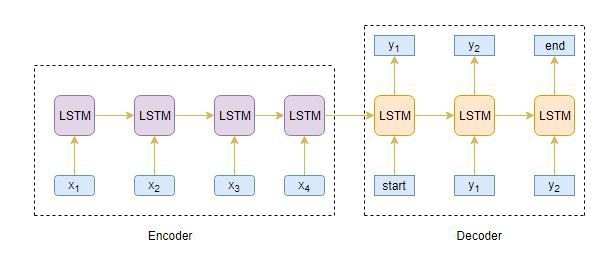

# Cleaning Data 

In [21]:
import re

#Removes non-alphabetic characters:
def clean_text(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row

In [22]:
text_clean = clean_text(pre['text'])
summary_clean =clean_text(pre['summary'])


In [23]:
# # showing some of dependant entities
# import spacy 
# from spacy import displacy
# nlp =spacy.load("en_core_web_sm")


# for i in range(5):
#   text = pre['text'][i] 
#   doc =nlp(text)
#   displacy.serve(doc ,style='dep')


#   print('-'*50)
#   print('-'*50)

In [26]:
import spacy 
import time 
nlp = spacy.load('en_core_web_sm' , disable =['ner' ,'parser'])


tic = time.time() 


#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 




text = [str(doc) for doc in nlp.pipe(text_clean , batch_size =512 )] 

toc =time.time()


print(f'time for preocessing is :====={round(tic-toc)/60} mins')

time for preocessing is :=====-9.0 mins


In [27]:
tic = time.time()

summary = ['_START_ ' + str(doc)+' _END_' for doc in nlp.pipe(summary_clean , batch_size =512)]

toc = time.time()
print(f'time for processing is :====={round(tic-toc) / 60}mins')

time for processing is :=====-1.5666666666666667mins


In [29]:
## adding our final result to our pre data frame


pre['clean_text'] = pd.Series(text)
pre['clean_summary'] = pd.Series(summary)

In [30]:
text_length = []
summary_length =[]


for sent in pre['clean_text']:
  text_length.append(  len(sent.split())   )
for sent in pre['clean_summary']:
  summary_length.append(len(sent.split()))


In [33]:
print(text_length[:5])
print(summary_length[:5])

[56, 58, 59, 60, 60]
[12, 12, 9, 9, 13]


In [34]:
pre['text_length'] = pd.Series(text_length)
pre['summary_length'] =pd.Series(summary_length)

In [35]:
pre.head()

,text,summary,clean_text,clean_summary,text_length,summary_length
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...,saurav kant an alumnus of upgrad and iiit-b pg...,_START_upgrad learner switches to career in ml...,56,12
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,kunal shah credit card bill payment platform c...,_START_delhi techie wins free food from swiggy...,58,12
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...,new zealand defeated india by wickets in the f...,_START_new zealand end rohit sharma-led india ...,59,9
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...,with aegon life iterm insurance plan customers...,_START_aegon life iterm insurance plan helps c...,60,9
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim...",speaking about the sexual harassment allegatio...,_START_have known hirani for yrs what if metoo...,60,13


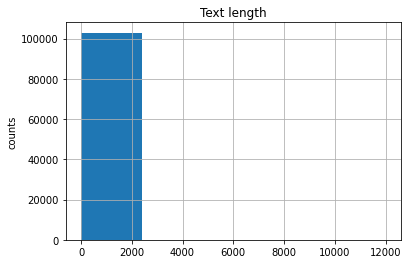

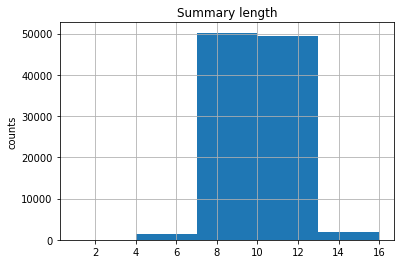

In [50]:
pre['text_length'].hist(bins = 5)
plt.ylabel('counts') 
plt.title('Text length')
plt.show()

pre['summary_length'].hist(bins =5)
plt.ylabel('counts') 
plt.title('Summary length')
plt.show()


In [56]:
## here we will check length of our summary and text words to determine max length 


count  = 0 
for i in pre['clean_summary'] :
  if (len(i.split()) <= 15) :
    count+=1 


print(count / len(pre['clean_summary']))


0.99997084973036


In [58]:
count = 0 

for sent in pre['clean_text']:
  if (len(sent.split()) <=100 ):
    count+=1 
print(count / len(pre['clean_text']))


0.9578389933440218


In [60]:
max_text_length = 100
max_summary_length =15




In [64]:
clean_text = np.array(pre['clean_text'])
clean_summary =np.array(pre['clean_summary'])


short_text =[]
short_summary=[]

for i in range(len(clean_text)):
  if (len(clean_text[i].split())<= max_text_length  ) and (len(clean_summary[i].split()) <= max_summary_length) :
    short_text.append(clean_text[i])
    short_summary.append(clean_summary[i])

In [68]:
post_pre = pd.DataFrame({'text' : short_text , 
                        'summary':short_summary})
post_pre.head()

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,_START_upgrad learner switches to career in ml...
1,kunal shah credit card bill payment platform c...,_START_delhi techie wins free food from swiggy...
2,new zealand defeated india by wickets in the f...,_START_new zealand end rohit sharma-led india ...
3,with aegon life iterm insurance plan customers...,_START_aegon life iterm insurance plan helps c...
4,speaking about the sexual harassment allegatio...,_START_have known hirani for yrs what if metoo...


In [69]:
post_pre['summary'] = post_pre['summary'].apply(lambda x: 'sostok' + x + 'eostok')

In [70]:
post_pre.head()

,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,sostok_START_upgrad learner switches to career...
1,kunal shah credit card bill payment platform c...,sostok_START_delhi techie wins free food from ...
2,new zealand defeated india by wickets in the f...,sostok_START_new zealand end rohit sharma-led ...
3,with aegon life iterm insurance plan customers...,sostok_START_aegon life iterm insurance plan h...
4,speaking about the sexual harassment allegatio...,sostok_START_have known hirani for yrs what if...


# spliting our data 

In [72]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(post_pre['text'] , post_pre['summary'] ,test_size =0.1 , random_state=42 , shuffle=True)



# let build OUR MODEL -->Seq2Seq

In [80]:
import tensorflow as tf 
from tensorflow import keras 
from keras.preprocessing.text import Tokenizer 
from keras.utils import pad_sequences





tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(X_train))


In [82]:
threshold = 4

less_count = 0 
less_freq = 0 
### 
total_counts = 0
total_freq =0 
####

for key , value in tokenizer.word_counts.items():
  total_counts +=1 
  total_freq +=value 

  if (value < threshold) :
    less_count+=1 
    less_freq+=value 


print(f'precentage of rare words in vocab = {less_count / total_counts}')
print(f'precentage of coverage of rare words ={less_freq / total_freq}')


precentage of rare words in vocab = 0.57843087790111
precentage of coverage of rare words =0.013370904459114074


In [84]:
# let applay our tokenizer and pad sequences function 


tokenizer = Tokenizer(num_words= total_counts)
tokenizer.fit_on_texts(list(X_train))


## convert our text into tokens or numbers to use it 


X_train_tokens = tokenizer.texts_to_sequences(X_train) 
X_valid_tokens = tokenizer.texts_to_sequences(X_valid) 


### doing padding method in our tensors or lists 


X_train_pad = pad_sequences(X_train_tokens , maxlen = max_text_length , padding = 'post')
X_valid_pad = pad_sequences(X_valid_tokens , maxlen = max_text_length , padding='post')


print(f'number of vocab words :{tokenizer.num_words + 1}')

number of vocab words :79281


In [85]:
# tokens for y labels 



y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

In [86]:
threshold = 4

less_count = 0 
less_freq = 0 
### 
total_counts = 0
total_freq =0 
####

for key , value in y_tokenizer.word_counts.items():
  total_counts +=1 
  total_freq +=value 

  if (value < threshold) :
    less_count+=1 
    less_freq+=value 


print(f'precentage of rare words in vocab = {less_count / total_counts}')
print(f'precentage of coverage of rare words ={less_freq / total_freq}')

precentage of rare words in vocab = 0.574622969837587
precentage of coverage of rare words =0.024390766570481674


In [88]:
y_tokenizer  = Tokenizer(num_words = total_counts) 


y_tokenizer.fit_on_texts(list(y_train))


y_train_tokens = y_tokenizer.texts_to_sequences(y_train ) 
y_valid_tokens = y_tokenizer.texts_to_sequences(y_valid )


y_train_pad = pad_sequences(y_train_tokens , maxlen = max_summary_length)
y_valid_pad = pad_sequences(y_valid_tokens , maxlen = max_summary_length)

print(f'numbers of words in y tokenizer :{y_tokenizer.num_words+1}')


numbers of words in y tokenizer :34481


In [91]:
y_train_pad

array([[    0,     3,     2, ...,   527,     1,     4],
       [    0,     3,     2, ...,   241,     1,     4],
       [    0,     0,     0, ...,  9143,     1,     4],
       ...,
       [    0,     0,     3, ...,   370,     1,     4],
       [    3,     2,    78, ..., 21561,     1,     4],
       [    0,     3,     2, ...,  2888,     1,     4]], dtype=int32)

In [90]:
X_train_pad

array([[2027, 1040,  345, ...,    0,    0,    0],
       [1882, 5424, 1883, ...,    0,    0,    0],
       [ 242,   57,  185, ...,    0,    0,    0],
       ...,
       [1276, 4068, 7043, ...,    0,    0,    0],
       [ 453,   51,   93, ...,    0,    0,    0],
       [ 761,   59, 3876, ...,    0,    0,    0]], dtype=int32)

## remove summary from data 

In [95]:
index = []
 

for i in range(len(y_train_pad)):
  count = 0 
  for j in (y_train_pad[i]):
    if j !=0 :
      count+=1 
    if count == 2 :
      index.append(i)



X_train = np.delete(X_train_pad , index ,axis=0) 
y_train = np.delete(y_train_pad , index , axis =0)

In [97]:
index = [] 


for i in range(len(y_valid_pad)):
  counts = 0 
  for j in y_valid_pad[i] :
    if j !=0 :
      counts+=1 
    if counts ==2 :
      index.append(i)

X_valid = np.delete(X_valid_pad , index  ,axis=0)
y_valid = np.delete(y_valid_pad , index , axis=0)






# MODEL

In [121]:
import tensorflow as tf 
import gensim
from bs4 import BeautifulSoup 
from tensorflow import keras
from keras.layers import Input ,LSTM , Dense , Embedding , Concatenate , TimeDistributed 
from keras.models import Model 
from keras.callbacks import EarlyStopping 
from keras import backend as k 
import warnings 
warnings.simplefilter('ignore')
####################################
X_vocab = tokenizer.num_words +1   #
y_vocab = y_tokenizer.num_words +1 #
#################################### 
                                                  #####################################
                                                  ###### Creat layers of Model ########
                                                  #####################################
k.clear_session()
embedding_dim = 200 
latent_dim = 300 


inputs = Input(shape=(max_text_length,)) 
embedding = Embedding(X_vocab , embedding_dim , trainable =True)(inputs)

lstm_1 = LSTM(latent_dim , activation ='relu' ,return_sequences =True , return_state=True ,dropout =0.4 , recurrent_dropout=0.4)
out_1 , state_h1 , state_c1 = lstm_1(embedding)

lstm_2 =LSTM(latent_dim , activation='relu' , return_sequences =True , return_state=True ,dropout =0.4 ,recurrent_dropout=0.4 )
out_2 ,state_h2 , state_c2 = lstm_2(out_1) 

lstm_3 = LSTM(latent_dim , activation = 'relu' , return_sequences=True , return_state =True ,dropout =0.4 , recurrent_dropout=0.4)
out_3 ,state_h3 , state_c3 = lstm_3(out_2)
####### steps for our output 
decode_input = Input(shape = (None ,))
decode_embedding = Embedding(y_vocab , embedding_dim , trainable=True)(decode_input)

decode_lstm = LSTM(latent_dim , activation ='relu' ,return_sequences =True , return_state=True ,dropout =0.4 , recurrent_dropout=0.4)
decode_out , decode_fwd_state , decode_back_state  = decode_lstm(decode_embedding  ,initial_state=[state_h3 , state_c3]) 


## dense layer for output 
decode_dense = TimeDistributed(Dense( y_vocab, activation='softmax')) 
final_output  = decode_dense(decode_out)
##### final model 
model  = Model([inputs ,decode_input] , final_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 200)     15856200    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [123]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=2e-5) , loss='sparse_categorical_crossentropy')

In [124]:
ES = EarlyStopping(monitor ='val_loss' ,mode ='min' ,verbose=1 , patience =2)

In [125]:
history=model.fit([X_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=50,callbacks=[ES],batch_size=128, 
                  validation_data=([X_valid,y_valid[:,:-1]], y_valid.reshape(y_valid.shape[0],y_valid.shape[1], 1)[:,1:]))

Epoch 1/50


ValueError: ignored